<a href="https://colab.research.google.com/github/shirishavissom/Development-of-Passive-Radar-System-/blob/main/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import plotly.graph_objects as go
#from findpeaks import findpeaks
#!pip install imagesc
#import imagesc as imagesc

from scipy.optimize import curve_fit
!pip install xlsxwriter
import xlsxwriter
import pandas as pd


# New Section

#Reading File

In [ ]:
f=open('FinalSpec.txt','r')
arr = list()
no_of_spectra = 15
for val in f.readlines():
  temp_arr = val.split(' ')
  temp_arr[-1] = temp_arr[-1][:-1]
  arr.extend([float(val) for val in temp_arr])
arr = np.array(arr[:no_of_spectra*4096],  dtype = float)

arr = np.reshape(arr,(no_of_spectra,4096))
print(arr)
arr = 20*np.log10(np.abs(arr))
print(arr[0][2048])
print(arr[0][0])
#sampling_freq = 2e6
#nyquist_freq = sampling_freq/2
#center_freq = 95e6
#wn = center_freq/nyquist_freq
#nfft = 4096
#spectral_resolution = sampling_freq/nfft

#arr = np.multiply(arr,wn)
##print(arr.shape)
#rint(type(arr))
#print(arr)
#488.28125

[[1.06544735e-05 1.07058454e-05 9.63218832e-06 ... 1.05062639e-05
  1.09297022e-05 1.00051644e-05]
 [1.05822642e-05 1.09582306e-05 1.15057676e-05 ... 1.02205476e-05
  1.09360045e-05 1.03837713e-05]
 [1.10128737e-05 1.06051409e-05 1.02536029e-05 ... 1.05454065e-05
  1.04818316e-05 1.08582648e-05]
 ...
 [1.04188931e-05 1.08707410e-05 1.04837249e-05 ... 1.05377577e-05
  1.03681001e-05 1.09970604e-05]
 [1.11110859e-05 1.01213038e-05 1.08027545e-05 ... 1.01506699e-05
  1.05849759e-05 1.11555257e-05]
 [1.04688839e-05 1.09853274e-05 1.05716598e-05 ... 1.00266063e-05
  1.06912529e-05 1.10029506e-05]]
27.257147654934535
-99.4493601613514


In [ ]:
a = np.copy(arr)
for i in range(0,no_of_spectra):
    for j in range(4096):
        a[i][j] = 94e6 + 488.28125*j
print(a)


[[94000000.      94000488.28125 94000976.5625  ... 95998535.15625
  95999023.4375  95999511.71875]
 [94000000.      94000488.28125 94000976.5625  ... 95998535.15625
  95999023.4375  95999511.71875]
 [94000000.      94000488.28125 94000976.5625  ... 95998535.15625
  95999023.4375  95999511.71875]
 ...
 [94000000.      94000488.28125 94000976.5625  ... 95998535.15625
  95999023.4375  95999511.71875]
 [94000000.      94000488.28125 94000976.5625  ... 95998535.15625
  95999023.4375  95999511.71875]
 [94000000.      94000488.28125 94000976.5625  ... 95998535.15625
  95999023.4375  95999511.71875]]


#Putting data in excel

In [ ]:
workbook = xlsxwriter.Workbook('array.xlsx')
worksheet = workbook.add_worksheet()
row = 0

for col, data in enumerate(arr):
    worksheet.write_column(row, col, data)

workbook.close()

#Finding Peak

[1280 1844 1864 2048]


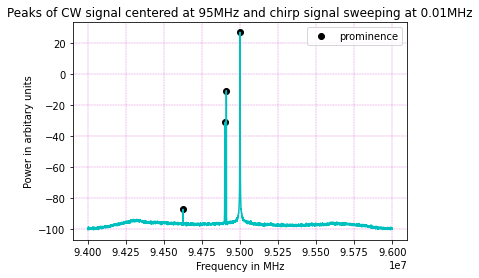

[1280 1864 1885 2048]


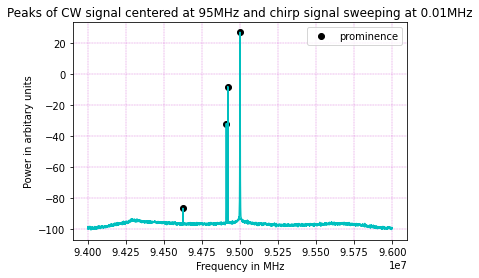

[1280 1885 1905 1926 2048]


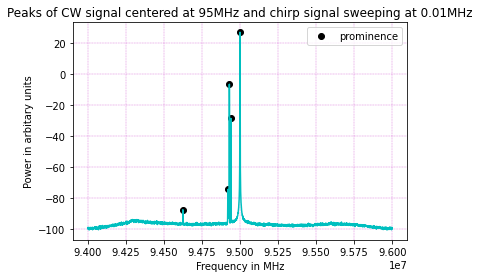

[1280 1926 1946 2048]


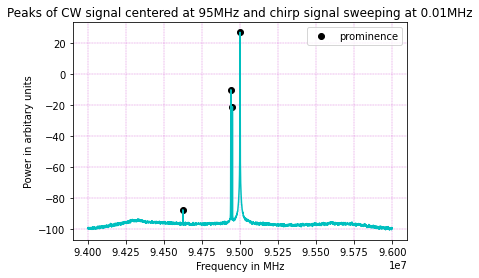

[1280 1946 1966 2048]


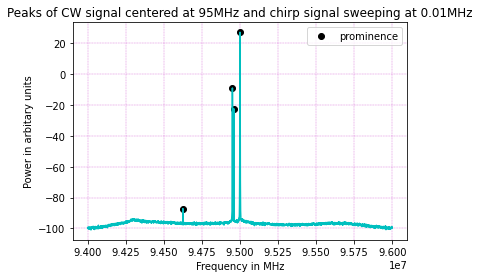

[1280 1966 1987 2048]


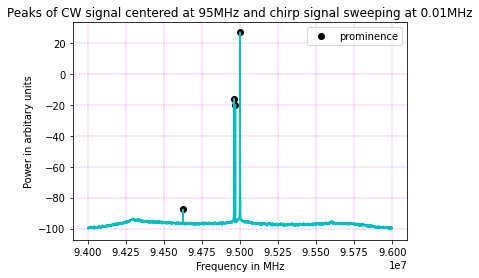

[1280 1987 2007 2048]


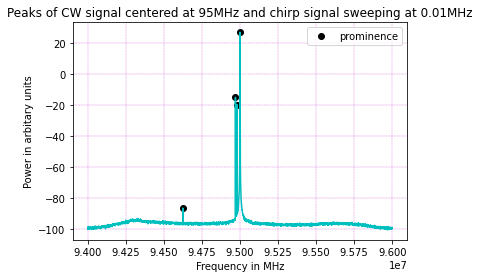

[1280 2007 2028 2048]


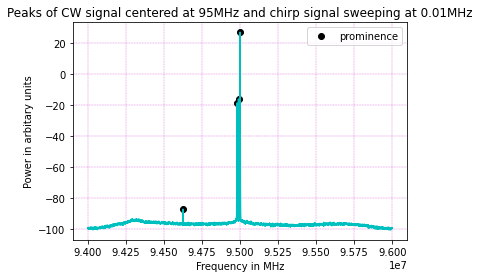

[1280 2028 2048]


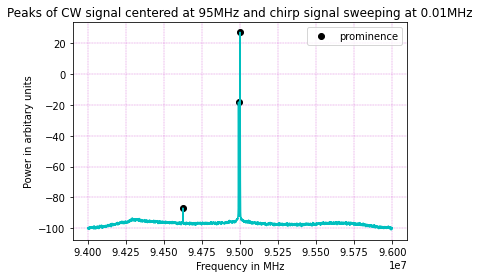

[1280 2048 2069]


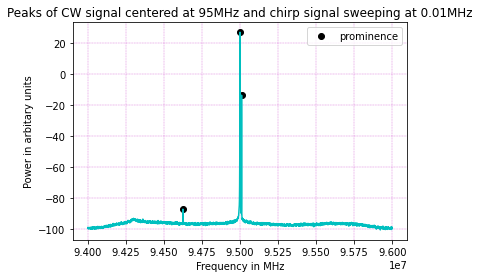

[1280 2048 2069 2089]


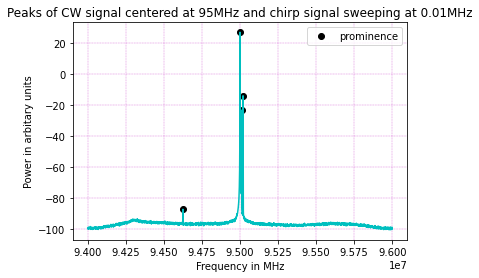

[1280 2048 2089 2110]


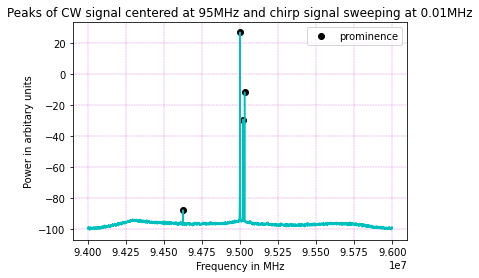

[1280 2048 2110 2130]


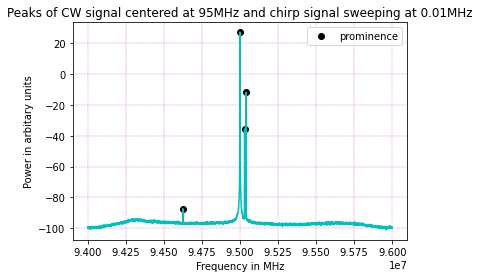

[1280 2048 2130 2151 2171]


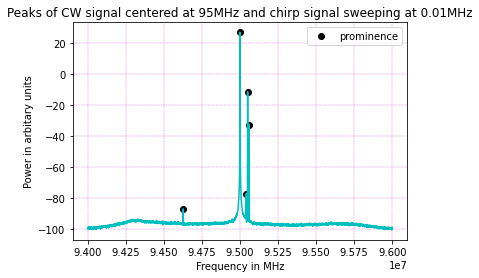

[1280 2048 2171 2192]


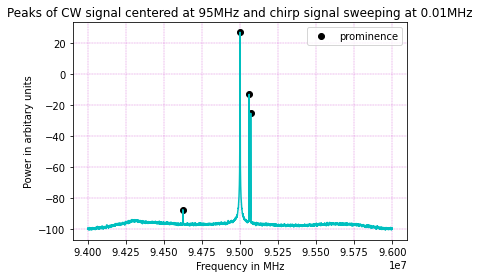

(15,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
stored=list()
plot_stored=list()
amplitude = list()
normalised_peaks = list()
mean_peak = list()
#p = list()

for i in range(0,no_of_spectra):

    #peaks, _ = find_peaks(arr[i,:], distance=250)
    peaks, _ = find_peaks(arr[i,:], prominence=5)      # BEST!
    #peaks3, _ = find_peaks(arr[i,:], width=20)
    #peaks4, _ = find_peaks(arr[i,:], threshold=1.5)     # Required vertical distance to its direct neighbouring samples, pretty useless
    #print(peaks.shape)
    #for j in(peaks):
        #amplitude.append(arr[i,j])
    stored.append(peaks)
    #mean_peak.append(np.floor(np.mean(peaks)))
    normalised_peaks.append(a[i][peaks]) 
    #for j in (peaks):
          #  c = 0
           # p[i][c] = 94e6 + 488.28125*j
        #p.extend(94e6 + 488.28125*j)
    print(peaks)
    #for i in range(0,15):
       # for j in (peaks):
          #  c = 0
           # p[i][c] = 94e6 + 488.28125*j
           # c =c+1
    #print(p)

    #print(normalised_peaks)
    
    plot_stored.extend(peaks)

    #plt.figure(1)
    #plt.plot(a[i,:],arr[i,:])
    #plt.figure(2)
    #plt.plot(peaks, arr[i,:][peaks], "xr"); plt.plot(arr[i,:]); plt.legend(['distance'])
    plt.figure(1)
    #plt.plot(peaks, arr[i,:][peaks], "ob",color='k'); plt.plot(arr[i,:],color = 'c'); plt.legend(['prominence'])
    plt.plot(normalised_peaks[i], arr[i,:][peaks], "ob",color='k'); plt.plot(a[i,:],arr[i,:],color = 'c'); plt.legend(['prominence'])
    #plt.figure(4)
    #plt.plot(peaks3, arr[i,:][peaks3], "vg"); plt.plot(arr[i,:]); plt.legend(['width'])
    #plt.figure(3)
    #plt.plot(peaks4, arr[i,:][peaks4], "xk"); plt.plot(arr[i,:]); plt.legend(['threshold'])
    plt.title('Peaks of CW signal centered at 95MHz and chirp signal sweeping at 0.01MHz')
    plt.xlabel('Frequency in MHz')
    plt.ylabel('Power in arbitary units')
    plt.grid(color='m', ls = '-.', lw = 0.25)
    plt.show()


stored = np.array(stored)
plot_stored = np.array(plot_stored)
#mean_peak = np.array(mean_peak)
#normalised_peaks = np.reshape(normalised_peaks,(1,15))
normalised_peaks = np.array(normalised_peaks)
print(normalised_peaks.shape)
#stored = np.remove(stored,(0),axis =0)
#amplitude = np.array(amplitude)
#print(amplitude.shape)
#plt.plot(stored)
#print(stored)
#print((arr[i,:][peaks]).shape)

#print(stored[3])
#94000000 94000488 94000976 

[array([94625000.     , 94790039.0625 , 94800292.96875, 95000000.     ])
 array([94625000.     , 94800292.96875, 94810058.59375, 95000000.     ])
 array([94625000.     , 94810058.59375, 94820312.5    , 95000000.     ])
 array([94625000.   , 94820312.5  , 94830078.125, 95000000.   ])
 array([94625000.     , 94830078.125  , 94840332.03125, 95000000.     ])
 array([94625000.     , 94840332.03125, 94850097.65625, 95000000.     ])
 array([94625000.    , 94860351.5625, 94870117.1875, 95000000.    ])
 array([94625000.     , 94870117.1875 , 94880371.09375, 95000000.     ,
       95071777.34375])
 array([94625000.     , 94880371.09375, 94890136.71875, 95000000.     ])
 array([94625000.     , 94890136.71875, 94900390.625  , 95000000.     ])
 array([94625000.   , 94900390.625, 94910156.25 , 95000000.   ])
 array([94625000.     , 94910156.25   , 94920410.15625, 95000000.     ])
 array([94625000.     , 94920410.15625, 94930175.78125, 95000000.     ])
 array([94625000.     , 94930175.78125, 94940429

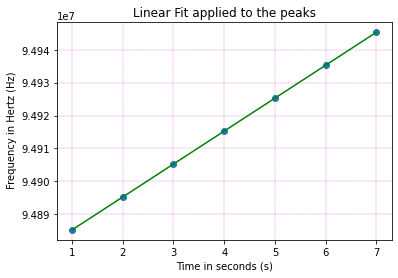

In [ ]:
print(normalised_peaks)
for i in range(no_of_spectra):
    index = np.where(normalised_peaks[i]==95e6)
    #print(index)
    #normalised_peaks[i]= np.delete(normalised_peaks[i],index)
    normalised_peaks[i]= np.delete(normalised_peaks[i],index)
    indexs = np.where(normalised_peaks[i]==94625000)
    #print(index)
    normalised_peaks[i]= np.delete(normalised_peaks[i],indexs)

#print(normalised_peaks)
for i in range(no_of_spectra):
    mean_peak.append(np.floor(np.mean(normalised_peaks[i])))

mean_peak = np.array(mean_peak)
#mean_peak = np.reshape(mean_peak,(1,15))
#print(mean_peak.shape)
#print(mean_peak)
#x = np.linspace(1,no_of_spectra,no_of_spectra)
x = np.linspace(1,7,7)
#x = np.linspace(1,6,6)
plt.plot(x,mean_peak[8:],'o')
#plt.plot(x,mean_peak[3:7],'o')
linear_model = np.polyfit(x,mean_peak[8:],1)
#linear_model = np.polyfit(x,mean_peak[3:7],1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(1,8)
plt.plot(x_s,linear_model_fn(x_s),color="green")
print(linear_model_fn)
plt.title('Linear Fit applied to the peaks')
plt.xlabel('Time in seconds (s)')
plt.ylabel(' Frequency in Hertz (Hz)')
plt.grid(color='m', ls = '-.', lw = 0.25)


[-204834. -194825. -184815. -174805. -164795. -154786. -134766.  -59245.
 -114747. -104737.  -94727.  -84717.  -74708.  -64698.  -54688.]
[-646844.21052632 -615236.84210526 -583626.31578947 -552015.78947368
 -520405.26315789 -488797.89473684 -425576.84210526 -187089.47368421
 -362358.94736842 -330748.42105263 -299137.89473684 -267527.36842105
 -235920.         -204309.47368421 -172698.94736842]
 
3.161e+04 x - 3.94e+05


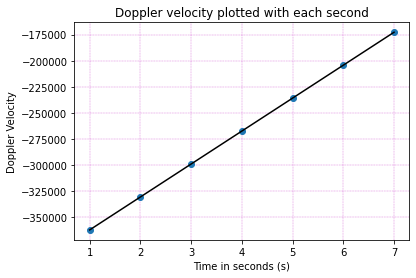

In [ ]:
#print(mean_peak)
doppler_frequency = np.subtract(mean_peak,95e6)
print(doppler_frequency)

#Doppler Velocity Calculation
doppler_velocity = np.divide(np.multiply(doppler_frequency,3e8),95e6)
print(doppler_velocity)
plt.plot(x,doppler_velocity[8:],'o')
linear_model1 = np.polyfit(x,doppler_velocity[8:],1)
linear_model1_fn=np.poly1d(linear_model1)
x_s=np.arange(1,8)
plt.plot(x_s,linear_model1_fn(x_s),color="black")
print(linear_model1_fn)
plt.title('Doppler velocity plotted with each second')
plt.xlabel('Time in seconds (s)')
plt.ylabel('Doppler Velocity')
plt.grid(color='m', ls = '-.', lw = 0.25)

#Imagesc


In [ ]:
print(stored[1][0])

for i in range(len(stored)):
    stored[i] = np.delete(stored[i],0)
#print(stored[1][0])
print(stored)
for i in range(len(stored)):
    stored[i] = np.abs(np.subtract(stored[i],2048))
print(stored)

225
[array([245, 225,   0]) array([204,   0]) array([184, 163,   0])
 array([143,   0]) array([122, 102,   0]) array([82, 61,  0])
 array([41,  0]) array([20,  0]) array([21]) array([21, 41, 62])
 array([62, 82]) array([ 82, 103, 123]) array([123, 144])
 array([144, 164, 185]) array([185, 205])]
[array([1803, 1823, 2048]) array([1844, 2048]) array([1864, 1885, 2048])
 array([1905, 2048]) array([1926, 1946, 2048]) array([1966, 1987, 2048])
 array([2007, 2048]) array([2028, 2048]) array([2027])
 array([2027, 2007, 1986]) array([1986, 1966]) array([1966, 1945, 1925])
 array([1925, 1904]) array([1904, 1884, 1863]) array([1863, 1843])]


[imagesc] >WARNING: Plot will be poorly visible if [linewidth>0] with rows/columns>100. Set linewidth=0 to adjust. [auto-adjusting...]


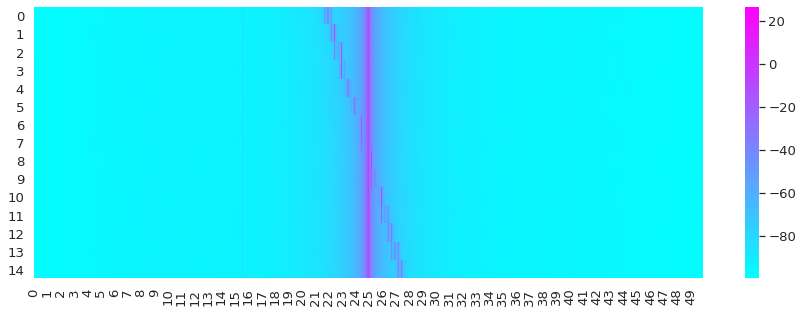

In [ ]:
fig = imagesc.seaborn(arr,cmap='cool', linecolor='#ffffff')